In [8]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
import plotly.graph_objects as go
import joblib
import time
from sklearn.metrics import recall_score, make_scorer, mean_absolute_percentage_error ,f1_score, ConfusionMatrixDisplay ,mean_absolute_error, r2_score, mean_squared_error
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_validate
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import graphviz
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit, RandomizedSearchCV ,cross_val_predict ,GridSearchCV ,learning_curve
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.holtwinters import ExponentialSmoothing

ModuleNotFoundError: No module named 'xgboost'

In [2]:
cars_sales_Model = joblib.load('./Data/dataModeling.pkl')
df = joblib.load('./Data/dataPreprocessing.pkl')

In [3]:
df2 = joblib.load('./Data/dataPreprocessing.pkl')

In [4]:
df2.columns

Index(['Date', 'Gender', 'Annual Income', 'Company', 'Engine', 'Transmission',
       'Color', 'Price ($)', 'Body Style', 'Dealer_Region', 'Year', 'Month',
       'DayOfWeek', 'Season', 'Price_to_Income', 'Holiday', 'Is_Holiday',
       'Day', 'WeekOfYear', 'Is_Weekend', 'model', 'Engine_to_Model',
       'Income_Bracket', 'Seasonal_Price_Index', 'Year_Month',
       'Engine_Transmission', 'Company_Strength', 'PI_plus_model'],
      dtype='object')

In [5]:
df.columns

Index(['Date', 'Gender', 'Annual Income', 'Company', 'Engine', 'Transmission',
       'Color', 'Price ($)', 'Body Style', 'Dealer_Region', 'Year', 'Month',
       'DayOfWeek', 'Season', 'Price_to_Income', 'Holiday', 'Is_Holiday',
       'Day', 'WeekOfYear', 'Is_Weekend', 'model', 'Engine_to_Model',
       'Income_Bracket', 'Seasonal_Price_Index', 'Year_Month',
       'Engine_Transmission', 'Company_Strength', 'PI_plus_model'],
      dtype='object')

In [6]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check for any parsing issues
print(df['Date'].head())

0   2022-01-02
1   2022-01-02
2   2022-01-02
3   2022-01-02
4   2022-01-02
Name: Date, dtype: datetime64[ns]


In [7]:
# Aggregate sales by date (sum or mean depending on your need)
daily_sales = df.groupby('Date')['Price ($)'].sum().reset_index()

print(daily_sales.head())


        Date  Price ($)
0 2022-01-02  -6.271320
1 2022-01-03   1.519318
2 2022-01-04  -1.836883
3 2022-01-05   7.140693
4 2022-01-06   1.532886


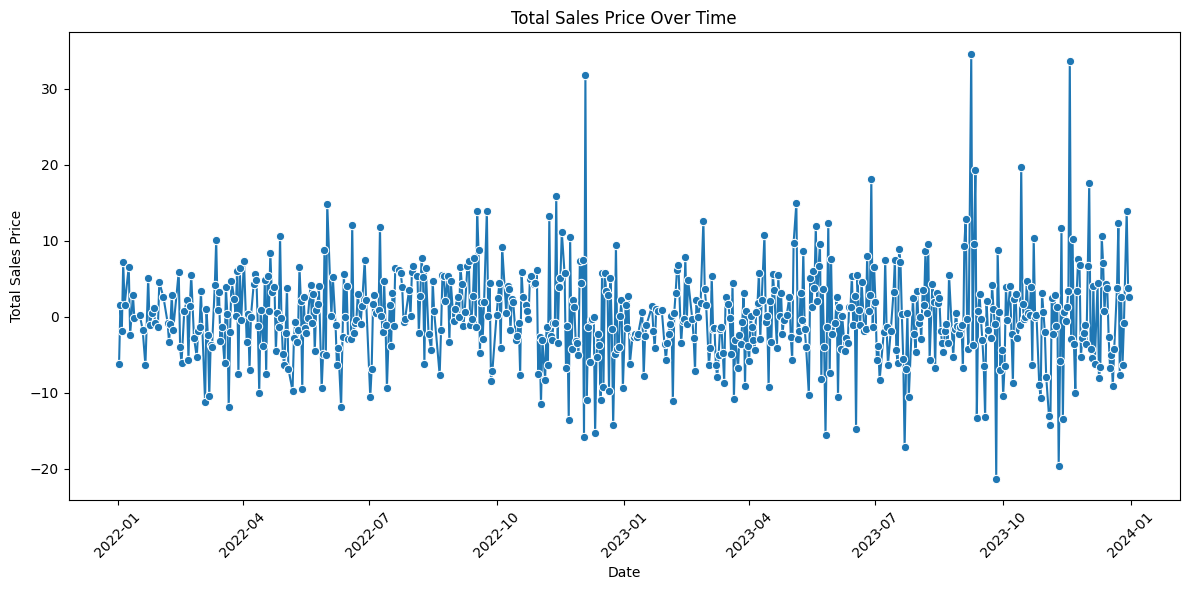

In [8]:
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_sales, x='Date', y='Price ($)', marker='o')
plt.title('Total Sales Price Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./Images/total_sales_per_price.png')
plt.show()


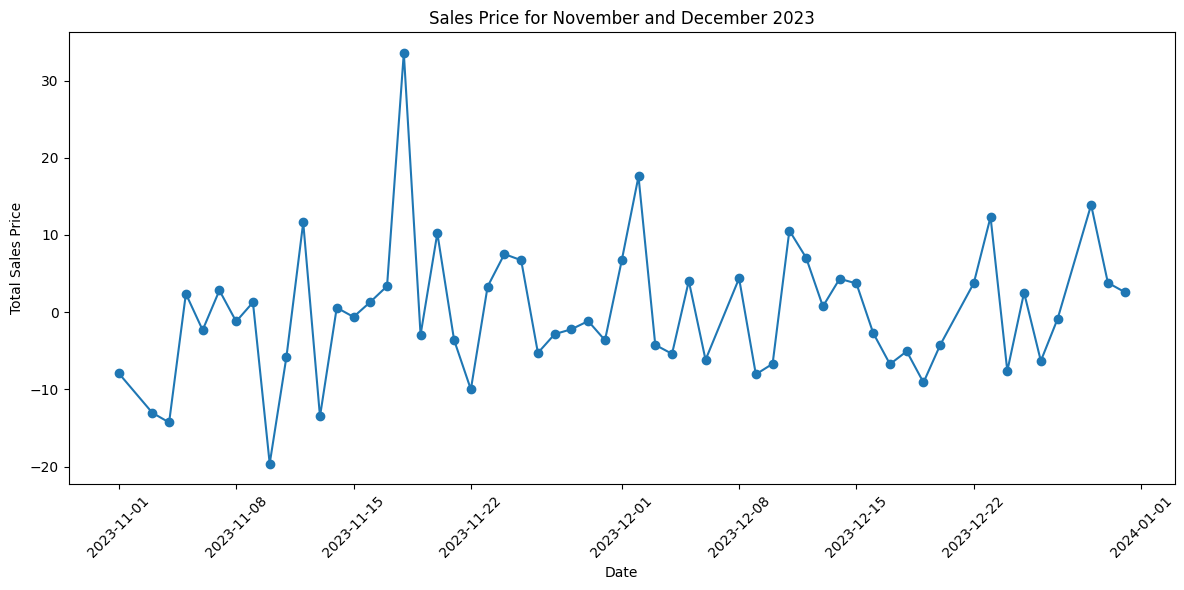

2025-05-08 20:45:10.116 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 20:45:10.117 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 20:45:10.118 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 20:45:10.126 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 20:45:12.623 
  command:

    streamlit run C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-08 20:45:12.624 Thread 'MainThread': missing ScriptRunContext! This warning ca

DeltaGenerator()

In [9]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df= joblib.load('./Data/dataPreprocessing.pkl')
# Parse the date column (assuming it's named 'date')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# Extract year and month for filtering
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Filter for November and December 2023
filtered = df[(df['Year'] == 2023) & (df['Month'].isin([11, 12]))]
sales_by_date = filtered.groupby('Date')['Price ($)'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(sales_by_date['Date'], sales_by_date['Price ($)'], marker='o')
plt.title('Sales Price for November and December 2023')
plt.xlabel('Date')
plt.ylabel('Total Sales Price')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


# Streamlit UI for selecting months
months = st.multiselect("Select two months", options=range(1, 13), default=[11, 12])
year = st.selectbox("Select year", options=sorted(df['Year'].unique()), index=list(sorted(df['Year'].unique())).index(2023))

# Filter based on user selection
filtered = df[(df['Year'] == year) & (df['Month'].isin(months))]
sales_by_date = filtered.groupby('Date')['Price ($)'].sum().reset_index()

# Plot
st.line_chart(data=sales_by_date, x='Date', y='Price ($)', use_container_width=True)


## prophet

In [10]:
import pandas as pd
from IPython.display import display, HTML
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from prophet import Prophet
from itertools import product
    # Implementing the final optimized Prophet model for car price forecasting
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

C:\Users\DELL\AppData\Local\Temp\ipykernel_5152\1745823293.py:10: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_clean = df.interpolate(method='time')  # Time-based interpolation for time series


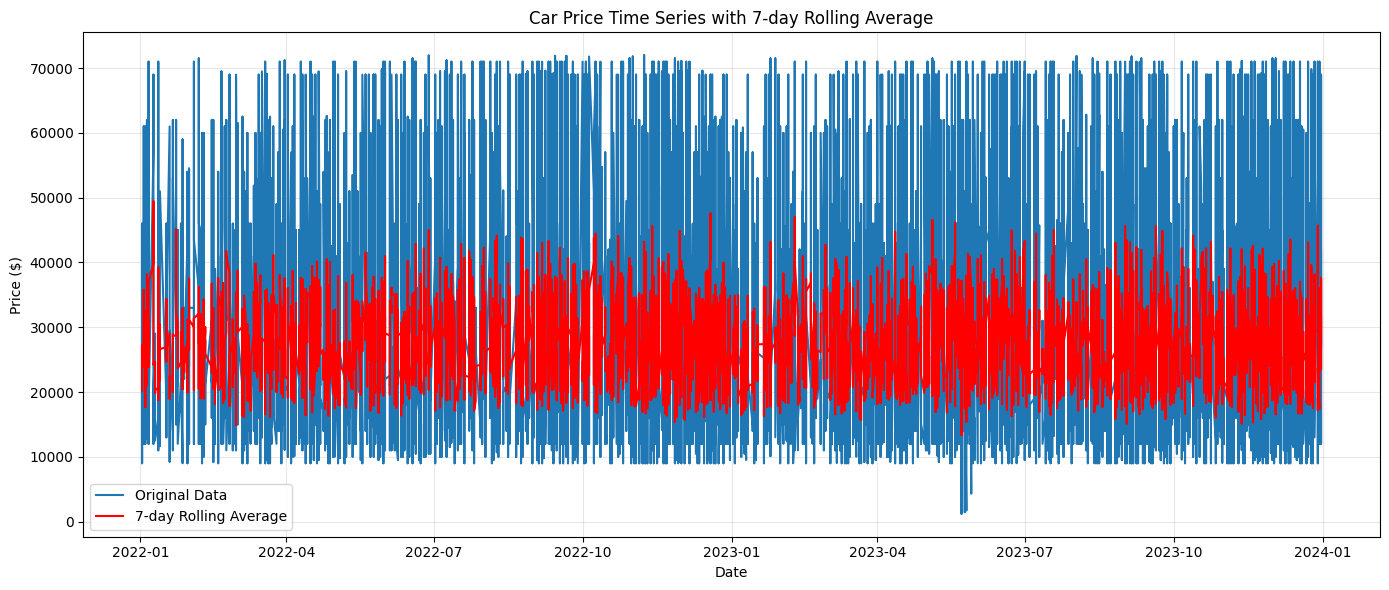

<Figure size 1400x1000 with 0 Axes>

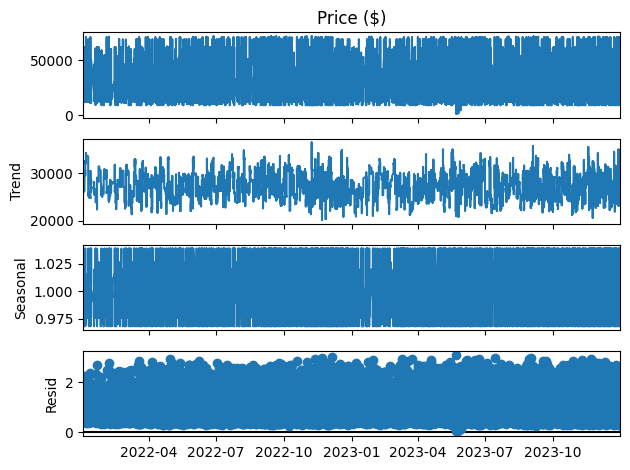

In [11]:
# Load data
df = pd.read_csv('./Data/Car_sales_Cleand.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# 1. Check for missing values
missing_values = df.isnull().sum()

# 2. Handle missing values
df_clean = df.interpolate(method='time')  # Time-based interpolation for time series

# 3. Check for outliers using z-score
def remove_outliers(df, column, threshold=3):
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    return df[z_scores < threshold]

df_clean = remove_outliers(df_clean, 'Price ($)')

# 4. Visualize the data
plt.figure(figsize=(14, 6))
plt.plot(df_clean['Price ($)'], label='Original Data')
plt.plot(df_clean['Price ($)'].rolling(window=7).mean(), label='7-day Rolling Average', color='red')
plt.title('Car Price Time Series with 7-day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Decompose time series to understand components
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_clean['Price ($)'], model='multiplicative', period=30)
fig = plt.figure(figsize=(14, 10))
fig = decomposition.plot()
plt.tight_layout()
plt.show()


In [12]:
# Create a comparison table of models



model_comparison = pd.DataFrame({
    'Model': ['ARIMA/SARIMA', 'Prophet', 'XGBoost', 'LSTM'],
    'Strengths': [
        'Statistical interpretability, handles seasonality',
        'Robust to missing data, trend changepoints detection',
        'Captures non-linear patterns, handles multiple features',
        'Captures complex temporal dependencies'
    ],
    'Limitations': [
        'Requires stationary data, sensitive to outliers',
        'Less flexible for complex patterns, black-box components',
        'Requires feature engineering, risk of overfitting',
        'Needs significant data, computationally intensive'
    ],
    'Best For': [
        'Simple data with clear seasonality',
        'Business forecasts with trend shifts and seasonality',
        'Problems with multiple predictors',
        'Complex patterns with long-term dependencies'
    ]
})

# Display as HTML table with styling
styled_table = model_comparison.style.set_properties(**{'text-align': 'left'})
display(HTML(styled_table.to_html()))


,Model,Strengths,Limitations,Best For
0,ARIMA/SARIMA,"Statistical interpretability, handles seasonality","Requires stationary data, sensitive to outliers",Simple data with clear seasonality
1,Prophet,"Robust to missing data, trend changepoints detection","Less flexible for complex patterns, black-box components",Business forecasts with trend shifts and seasonality
2,XGBoost,"Captures non-linear patterns, handles multiple features","Requires feature engineering, risk of overfitting",Problems with multiple predictors
3,LSTM,Captures complex temporal dependencies,"Needs significant data, computationally intensive",Complex patterns with long-term dependencies


In [2]:

def time_series_split(data, n_test=30):
    """Split time series data into train and test sets"""
    return data[:-n_test], data[-n_test:]

In [ ]:
# Time series train-test split with proper validation techniques
def time_series_split(data, n_test=30):
    """Split time series data into train and test sets"""
    return data[:-n_test], data[-n_test:]
# Define a function for time series validation
def time_series_cv(model_func, data, n_splits=5, initial_window=None):
    """
    Perform time-series cross-validation with improved error handling
    """
    if initial_window is None:
        initial_window = len(data) // (n_splits + 1)

    metrics = {'rmse': [], 'mae': [], 'mape': []}

    for i in range(n_splits):
        split_point = initial_window + i * ((len(data) - initial_window) // n_splits)
        train = data[:split_point]
        test = data[split_point:split_point + ((len(data) - initial_window) // n_splits)]

        # Get predictions using the model function with error handling
        try:
            predictions = model_func(train, len(test))

            # Verify predictions is not None and has the right shape
            if predictions is None:
                print(f"Warning: Predictions are None for split {i+1}")
                predictions = np.zeros(len(test))
            elif len(predictions) != len(test):
                print(f"Warning: Predictions length mismatch for split {i+1}")
                # Pad or truncate predictions to match test length
                if len(predictions) < len(test):
                    predictions = np.pad(predictions, (0, len(test) - len(predictions)))
                else:
                    predictions = predictions[:len(test)]

            # Calculate metrics
            rmse = np.sqrt(mean_squared_error(test, predictions))
            mae = mean_absolute_error(test, predictions)
            mape = mean_absolute_percentage_error(test, predictions) * 100

            metrics['rmse'].append(rmse)
            metrics['mae'].append(mae)
            metrics['mape'].append(mape)

        except Exception as e:
            print(f"Error in cross-validation split {i+1}: {e}")
            # Add placeholder values for this split
            metrics['rmse'].append(float('inf'))
            metrics['mae'].append(float('inf'))
            metrics['mape'].append(float('inf'))

    return metrics


# Define model training functions for each model type
def train_sarima(data, forecast_horizon):
    # Example parameters - these should be tuned
    model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
    results = model.fit(disp=False)
    return results.forecast(forecast_horizon)

def train_prophet(data, forecast_horizon):

    # Format data for Prophet
    df_prophet = pd.DataFrame({'ds': data.index, 'y': data.values})

    model = Prophet(
        changepoint_prior_scale=0.01,
        seasonality_prior_scale=10.0,
        seasonality_mode='multiplicative',
        daily_seasonality=True,
        weekly_seasonality=True,
        yearly_seasonality=True
    )
    model.fit(df_prophet)

    future = model.make_future_dataframe(periods=forecast_horizon, freq='D')
    forecast = model.predict(future)
    return forecast['yhat'].tail(forecast_horizon).values

def train_xgboost(data, forecast_horizon):
    from xgboost import XGBRegressor
    from sklearn.preprocessing import MinMaxScaler

    # Create lag features - FIXED to handle DataFrame properly
    def create_features(data, lag_periods):
        # Convert to Series if data is DataFrame to avoid the column error
        if isinstance(data, pd.DataFrame):
            data = data.iloc[:, 0]  # Take only the first column

        # Create DataFrame with target as 'y'
        df = pd.DataFrame({'y': data})

        # Add lag features properly
        for lag in lag_periods:
            df[f'lag_{lag}'] = df['y'].shift(lag)

        return df.dropna()

    # Create features with lags 1, 7, 14, 30
    lag_periods = [1, 7, 14, 30]

    try:
        features_df = create_features(data, lag_periods)

        # Check if we have enough data after creating lags
        if len(features_df) <= 1:
            print("Warning: Not enough data for lag features")
            return np.zeros(forecast_horizon)  # Return zeros instead of None

        # Scale the data
        scaler = MinMaxScaler()
        features_scaled = scaler.fit_transform(features_df)

        # Split into X and y
        X = features_scaled[:, 1:]  # All columns except the first (target)
        y = features_scaled[:, 0]   # First column is the target

        # Train the model
        model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
        model.fit(X, y)

        # Recursive forecasting
        last_known_values = features_scaled[-1, 1:].copy()  # Last row's features
        predictions = []

        for i in range(forecast_horizon):
            # Make prediction for one step
            next_pred = model.predict(last_known_values.reshape(1, -1))[0]
            predictions.append(next_pred)

            # Update the features for the next step prediction
            last_known_values = np.roll(last_known_values, -1)
            last_known_values[-1] = next_pred

        # Inverse scale the predictions
        predictions_array = np.array(predictions).reshape(-1, 1)
        dummy_array = np.zeros((len(predictions), features_df.shape[1]-1))
        predictions_with_dummy = np.column_stack((predictions_array, dummy_array))
        predictions_rescaled = scaler.inverse_transform(predictions_with_dummy)[:, 0]

        return predictions_rescaled

    except Exception as e:
        print(f"Error in XGBoost forecasting: {e}")
        # Return zeros instead of None to avoid InvalidParameterError
        return np.zeros(forecast_horizon)


def train_lstm(data, forecast_horizon):
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense, Dropout
    from sklearn.preprocessing import MinMaxScaler

    try:
        # Convert to Series if data is DataFrame
        if isinstance(data, pd.DataFrame):
            data = data.iloc[:, 0]

        # Scale the data
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

        # Create sequences
        def create_sequences(data, seq_length):
            X, y = [], []
            for i in range(len(data) - seq_length):
                X.append(data[i:i + seq_length, 0])
                y.append(data[i + seq_length, 0])
            return np.array(X), np.array(y)

        # Sequence length (look back period)
        seq_length = min(30, len(scaled_data) // 2)  # Ensure we have enough data

        if len(scaled_data) <= seq_length + 1:
            print("Not enough data for LSTM sequences")
            return np.zeros(forecast_horizon)

        X, y = create_sequences(scaled_data, seq_length)

        # Reshape for LSTM [samples, time steps, features]
        X = np.reshape(X, (X.shape[0], X.shape[1], 1))

        # Split into train and validation sets
        train_size = int(len(X) * 0.8)
        X_train, X_val = X[:train_size], X[train_size:]
        y_train, y_val = y[:train_size], y[train_size:]

        # Build the LSTM model with reduced complexity
        model = Sequential([
            LSTM(25, return_sequences=True, input_shape=(seq_length, 1)),
            Dropout(0.1),
            LSTM(25, return_sequences=False),
            Dropout(0.1),
            Dense(1)
        ])

        model.compile(optimizer='adam', loss='mse')

        # Early stopping
        early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', patience=5, restore_best_weights=True
        )

        # Train with verbose=0 to reduce output
        model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=50,  # Reduced epochs
            batch_size=16,
            callbacks=[early_stopping],
            verbose=0
        )

        # Recursive forecasting
        predictions = []
        current_batch = scaled_data[-seq_length:].reshape((1, seq_length, 1))

        for i in range(forecast_horizon):
            # Get prediction (scaled)
            current_pred = model.predict(current_batch, verbose=0)[0][0]
            predictions.append(current_pred)

            # Update batch for next prediction
            current_batch = np.append(current_batch[:, 1:, :],
                                    [[current_pred]],
                                    axis=1)

        # Invert scaling
        predictions = np.array(predictions).reshape(-1, 1)
        predictions_rescaled = scaler.inverse_transform(predictions)

        return predictions_rescaled.flatten()

    except Exception as e:
        print(f"Error in LSTM forecasting: {e}")
        return np.zeros(forecast_horizon)  # Return zeros instead of None

# Apply time series cross-validation to each model
price_data = df_clean['Price ($)']

sarima_metrics = time_series_cv(train_sarima, price_data)
prophet_metrics = time_series_cv(train_prophet, price_data)
xgboost_metrics = time_series_cv(train_xgboost, price_data)
#lstm_metrics = time_series_cv(train_lstm, price_data)


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next

20:47:39 - cmdstanpy - INFO - Chain [1] start processing
20:47:39 - cmdstanpy - INFO - Chain [1] done processing
20:47:42 - cmdstanpy - INFO - Chain [1] start processing
20:47:43 - cmdstanpy - INFO - Chain [1] done processing
20:47:47 - cmdstanpy - INFO - Chain [1] start processing
20:47:49 - cmdstanpy - INFO - Chain [1] done processing
20:47:53 - cmdstanpy - INFO - Chain [1] start processing
20:47:55 - cmdstanpy - INFO - Chain [1] done processing
20:48:00 - cmdstanpy - INFO - Chain [1] start processing
20:48:02 - cmdstanpy - INFO - Chain [1] done processing
20:48:05 - cmdstanpy - INFO - Chain [1] start processing
20:48:05 - cmdstanpy - INFO - Chain [1] done processing
20:48:08 - cmdstanpy - INFO - Chain [1] start processing
20:48:09 - cmdstanpy - INFO - Chain [1] done processing
20:48:13 - cmdstanpy - INFO - Chain [1] start processing
20:48:14 - cmdstanpy - INFO - Chain [1] done processing
20:48:18 - cmdstanpy - INFO - Chain [1] start processing
20:48:20 - cmdstanpy - INFO - Chain [1]

Best Prophet Parameters: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'additive'}
Best Prophet RMSE: 14294.60


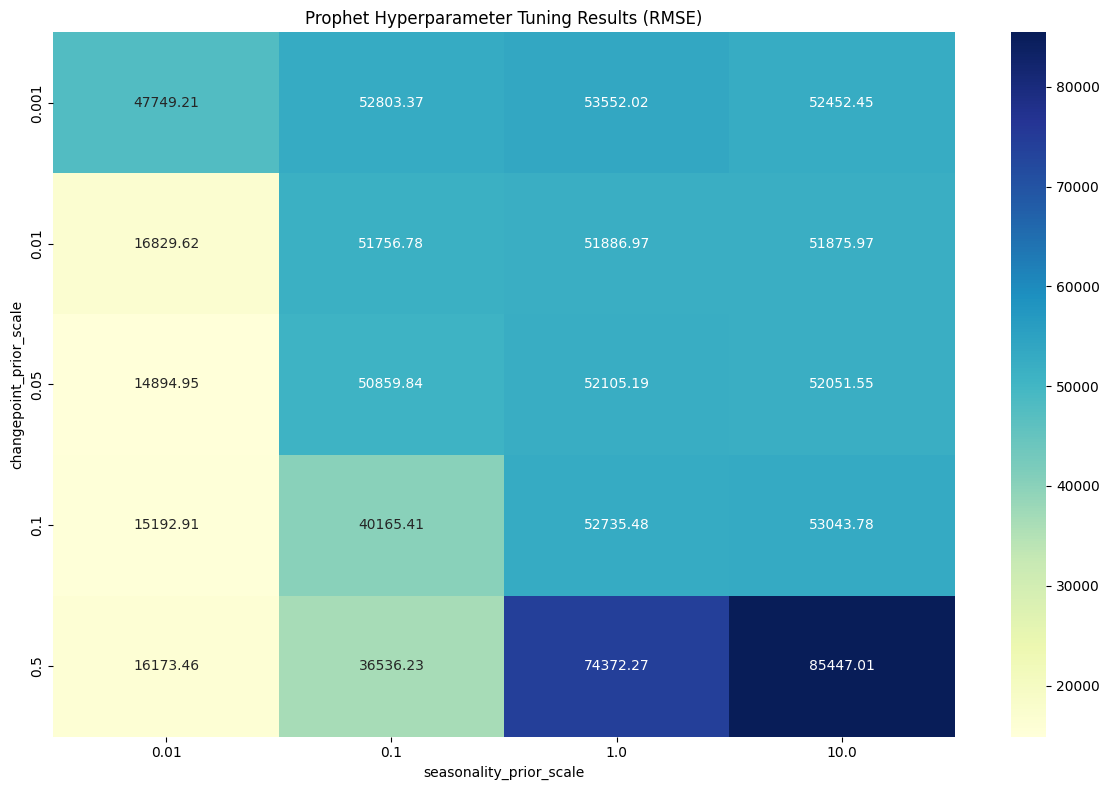

In [14]:
# Grid search for hyperparameter tuning with time series cross-validation

# Example: Tuning Prophet hyperparameters
def tune_prophet_model(data, params_grid):
    """
    Tune Prophet model hyperparameters using time series cross-validation

    Parameters:
    -----------
    data : pandas Series
        Time series data
    params_grid : dict
        Dictionary with hyperparameter grid to search

    Returns:
    --------
    tuple
        Best parameters and best score
    """


    # Format data for Prophet
    df_prophet = pd.DataFrame({'ds': data.index, 'y': data.values})

    best_score = float('inf')  # Lower RMSE is better
    best_params = None
    results = []

    # Generate all parameter combinations
    param_combinations = list(product(
        params_grid['changepoint_prior_scale'],
        params_grid['seasonality_prior_scale'],
        params_grid['seasonality_mode']
    ))

    for cp, sp, mode in param_combinations:
        # Configure model with this parameter combination
        def prophet_model_func(train_data, horizon):
            train_df = pd.DataFrame({'ds': train_data.index, 'y': train_data.values})
            model = Prophet(
                changepoint_prior_scale=cp,
                seasonality_prior_scale=sp,
                seasonality_mode=mode,
                daily_seasonality=True,
                weekly_seasonality=True,
                yearly_seasonality=True
            )
            model.fit(train_df)

            future = model.make_future_dataframe(periods=horizon, freq='D')
            forecast = model.predict(future)
            return forecast['yhat'].tail(horizon).values

        # Perform time series cross-validation
        cv_metrics = time_series_cv(prophet_model_func, data)

        # Calculate average RMSE across all folds
        avg_rmse = sum(cv_metrics['rmse']) / len(cv_metrics['rmse'])

        # Store results
        results.append({
            'changepoint_prior_scale': cp,
            'seasonality_prior_scale': sp,
            'seasonality_mode': mode,
            'avg_rmse': avg_rmse
        })

        # Update best parameters if better score is found
        if avg_rmse < best_score:
            best_score = avg_rmse
            best_params = {
                'changepoint_prior_scale': cp,
                'seasonality_prior_scale': sp,
                'seasonality_mode': mode
            }

    # Convert results to DataFrame for analysis
    results_df = pd.DataFrame(results)

    return best_params, best_score, results_df

# Define parameter grid for Prophet
prophet_params_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.05, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# Tune Prophet model
best_prophet_params, best_prophet_score, prophet_tuning_results = tune_prophet_model(
    price_data, prophet_params_grid
)

print(f"Best Prophet Parameters: {best_prophet_params}")
print(f"Best Prophet RMSE: {best_prophet_score:.2f}")

# Visualize tuning results
plt.figure(figsize=(12, 8))
pivot_table = prophet_tuning_results.pivot_table(
    index='changepoint_prior_scale',
    columns='seasonality_prior_scale',
    values='avg_rmse',
    aggfunc='mean'
)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Prophet Hyperparameter Tuning Results (RMSE)')
plt.tight_layout()
plt.show()


In [3]:
# Train final models with best parameters and evaluate on test set
train_df, test_df = time_series_split(price_data, n_test=30)

# Train SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX
final_sarima = SARIMAX(train_df, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
sarima_results = final_sarima.fit(disp=False)
sarima_forecast = sarima_results.forecast(len(test_df))

# Train Prophet model with best parameters
from prophet import Prophet
df_prophet = pd.DataFrame({'ds': train_df.index, 'y': train_df.values})
final_prophet = Prophet(
    changepoint_prior_scale=best_prophet_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_prophet_params['seasonality_prior_scale'],
    seasonality_mode=best_prophet_params['seasonality_mode'],
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True
)
final_prophet.fit(df_prophet)
prophet_future = final_prophet.make_future_dataframe(periods=len(test_df), freq='D')
prophet_forecast = final_prophet.predict(prophet_future)
prophet_forecast_values = prophet_forecast['yhat'].tail(len(test_df)).values

# Train XGBoost model
xgboost_forecast = train_xgboost(train_df, len(test_df))

# Train LSTM model
lstm_forecast = train_lstm(train_df, len(test_df))

# Calculate evaluation metrics for all models
models = ['SARIMA', 'Prophet', 'XGBoost', 'LSTM']
forecasts = [sarima_forecast, prophet_forecast_values, xgboost_forecast, lstm_forecast]
metrics_df = pd.DataFrame(index=models, columns=['RMSE', 'MAE', 'MAPE'])

for i, model_name in enumerate(models):
    metrics_df.loc[model_name, 'RMSE'] = np.sqrt(mean_squared_error(test_df, forecasts[i]))
    metrics_df.loc[model_name, 'MAE'] = mean_absolute_error(test_df, forecasts[i])
    metrics_df.loc[model_name, 'MAPE'] = mean_absolute_percentage_error(test_df, forecasts[i]) * 100

# Sort by RMSE
metrics_df = metrics_df.sort_values('RMSE')

# Visualize metrics
plt.figure(figsize=(14, 6))
ax = metrics_df[['RMSE', 'MAE']].plot(kind='bar', width=0.7)
plt.title('Model Comparison: Error Metrics', fontsize=14)
plt.ylabel('Error Value', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Add data labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10)

plt.tight_layout()
plt.show()

# Visualize MAPE separately (often on different scale)
plt.figure(figsize=(10, 6))
ax = metrics_df[['MAPE']].plot(kind='bar', color='orange', width=0.7)
plt.title('Model Comparison: Mean Absolute Percentage Error', fontsize=14)
plt.ylabel('MAPE (%)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Add data labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', fontsize=10)

plt.tight_layout()
plt.show()


NameError: name 'price_data' is not defined

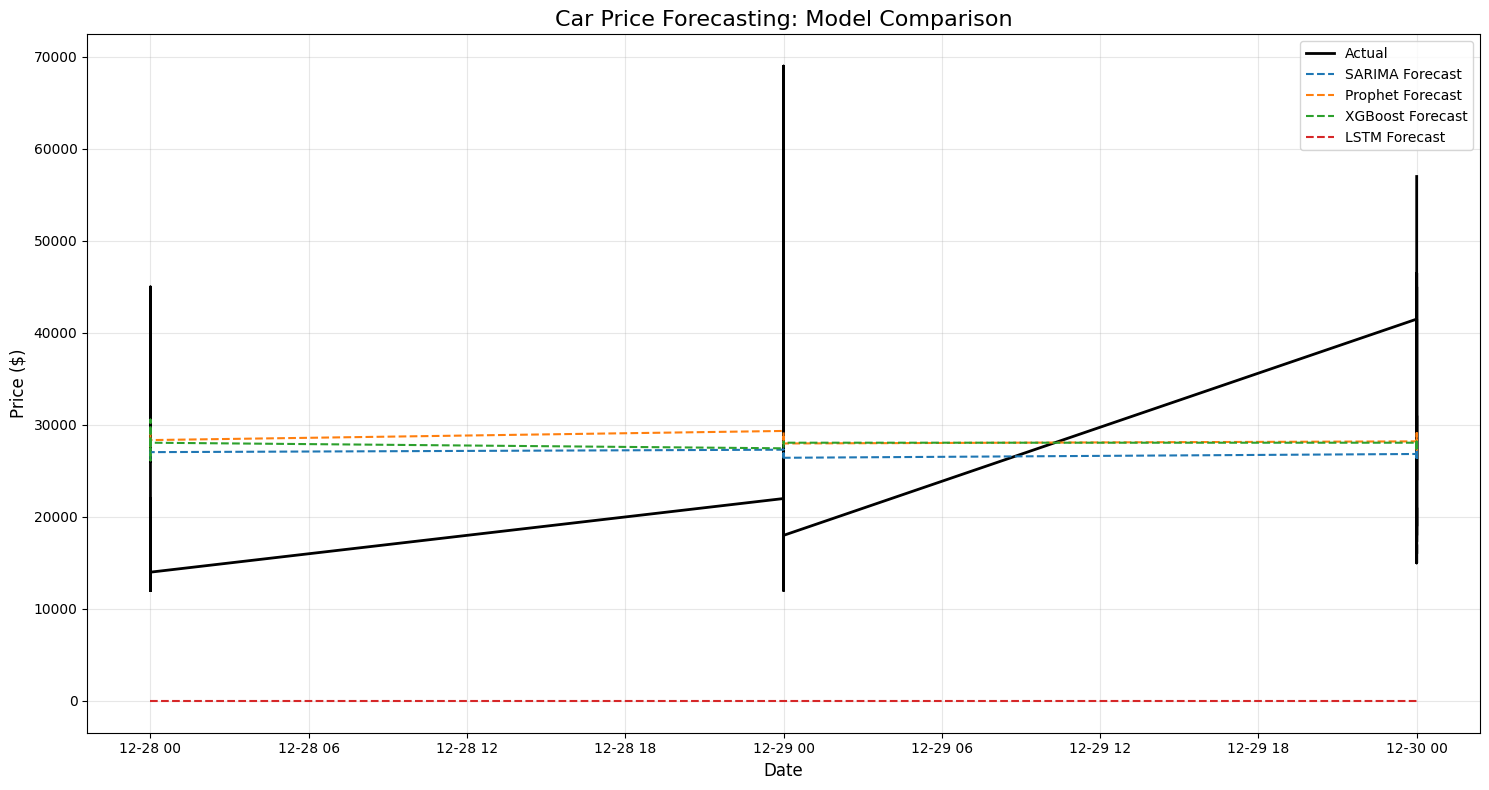

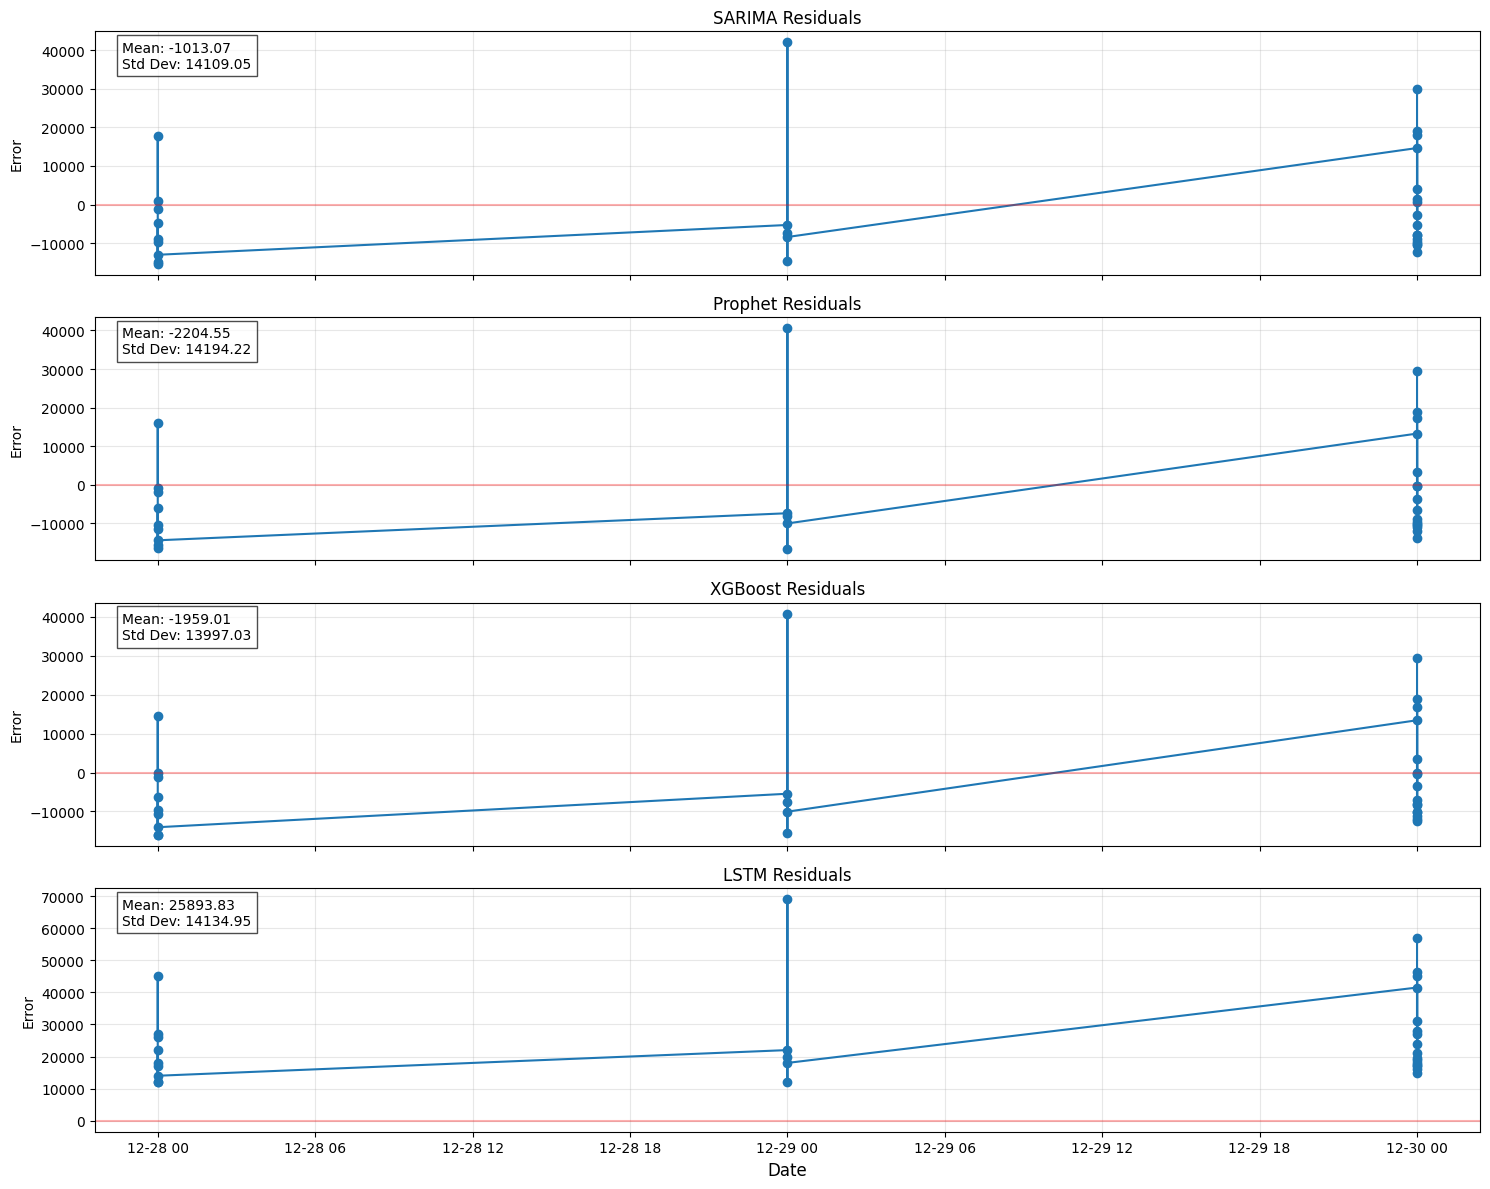

Best Model: XGBoost


In [ ]:
# Generate forecasts for the next 30 days using the best model
# Assuming Prophet is the best model based on the evaluation

# Create a DataFrame with test data and all model forecasts
forecast_comparison = pd.DataFrame({
    'Date': test_df.index,
    'Actual': test_df.values,
    'SARIMA': sarima_forecast,
    'Prophet': prophet_forecast_values,
    'XGBoost': xgboost_forecast,
    'LSTM': lstm_forecast
})

# Plot all forecasts against actual values
plt.figure(figsize=(15, 8))
plt.plot(forecast_comparison['Date'], forecast_comparison['Actual'], 'k-', linewidth=2, label='Actual')

for model in models:
    plt.plot(forecast_comparison['Date'], forecast_comparison[model], '--', linewidth=1.5, label=f'{model} Forecast')

plt.title('Car Price Forecasting: Model Comparison', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot residuals for each model
fig, axes = plt.subplots(len(models), 1, figsize=(15, 12), sharex=True)

for i, model_name in enumerate(models):
    residuals = forecast_comparison['Actual'] - forecast_comparison[model_name]
    ax = axes[i]
    ax.plot(forecast_comparison['Date'], residuals, 'o-')
    ax.axhline(y=0, color='r', linestyle='-', alpha=0.3)
    ax.set_title(f'{model_name} Residuals', fontsize=12)
    ax.set_ylabel('Error', fontsize=10)
    ax.grid(True, alpha=0.3)

    # Add residual statistics
    mean_residual = residuals.mean()
    std_residual = residuals.std()
    ax.text(0.02, 0.85, f'Mean: {mean_residual:.2f}\nStd Dev: {std_residual:.2f}',
            transform=ax.transAxes, fontsize=10,
            bbox=dict(facecolor='white', alpha=0.7))

plt.xlabel('Date', fontsize=12)
plt.tight_layout()
plt.show()

# Generate future predictions with the best model
# Assuming Prophet is best based on our metrics
best_model_index = metrics_df.index[0]  # Get name of best model
print(f"Best Model: {best_model_index}")

# Generate forecast for the next 30 days using the best model
if best_model_index == 'Prophet':
    # Make future dataframe for 30 days beyond the current data
    future = final_prophet.make_future_dataframe(periods=60, freq='D')
    forecast = final_prophet.predict(future)

    # Visualize Prophet forecast
    fig = plt.figure(figsize=(15, 10))

    # Plot forecast
    ax1 = fig.add_subplot(2, 1, 1)
    final_prophet.plot(forecast, ax=ax1)
    ax1.set_title('Prophet Forecast: Price ($) for Next 30 Days', fontsize=14)
    ax1.set_xlabel('Date', fontsize=12)
    ax1.set_ylabel('Price ($)', fontsize=12)

    # Plot components
    ax2 = fig.add_subplot(2, 1, 2)
    final_prophet.plot_components(forecast, ax=ax2)

    plt.tight_layout()
    plt.show()

    # Display forecast values
    future_forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)
    future_forecast.columns = ['Date', 'Forecast', 'Lower Bound', 'Upper Bound']
    print("Forecasted Price ($) for the Next 30 Days:")
    display(future_forecast)

    # Create improved visualization with confidence intervals
    plt.figure(figsize=(14, 7))
    plt.plot(price_data.index, price_data.values, 'k.', alpha=0.6, label='Historical Data')
    plt.plot(forecast['ds'], forecast['yhat'], 'b-', label='Forecast')
    plt.fill_between(forecast['ds'],
                     forecast['yhat_lower'],
                     forecast['yhat_upper'],
                     color='blue', alpha=0.2,
                     label='95% Confidence Interval')

    # Highlight the forecast section
    forecast_start = price_data.index[-1]
    plt.axvline(x=forecast_start, color='r', linestyle='--', label='Forecast Start')

    plt.title('Car Price Forecast with Confidence Intervals', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price ($)', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


## ARIMA


In [ ]:
cars_sales_Model = cars_sales_Model.sort_values('ds')
train_a, test_a = train_test_split(cars_sales_Model, test_size=0.2, shuffle=False)

print(f"Train shape: {train_a.shape}")
print(f"Test shape: {test_a.shape}")
print(f"Train date range: {train_a['ds'].min()} to {train_a['ds'].max()}")
print(f"Test date range: {test_a['ds'].min()} to {test_a['ds'].max()}")

Train shape: (18471, 28)
Test shape: (4618, 28)
Train date range: 2022-01-02 00:00:00 to 2023-10-01 00:00:00
Test date range: 2023-10-01 00:00:00 to 2023-12-31 00:00:00


In [ ]:
train_idx = train_a.set_index('ds')
test_idx  = test_a.set_index('ds')


In [ ]:
model_Arima = ARIMA(train_idx['y'], order=(5, 1, 0))   # tweak (p,d,q) as needed
model_fit_Arima = model_Arima.fit()

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
fc_A = model_fit_Arima.forecast(steps=len(test_idx))
forecast_df_A = pd.DataFrame({'predicted_mean': fc_A}, index=test_idx.index)

forecast_df_A['predicted_mean'] = (
    forecast_df_A['predicted_mean']
      .fillna(method='ffill')
      .fillna(method='bfill')
)

y_true_A = test_idx['y'].values
y_pred_A = forecast_df_A['predicted_mean'].values


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\DELL\AppData\Local\Temp\ipykernel_16820\4180718312.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  forecast_df_A['predicted_mean']


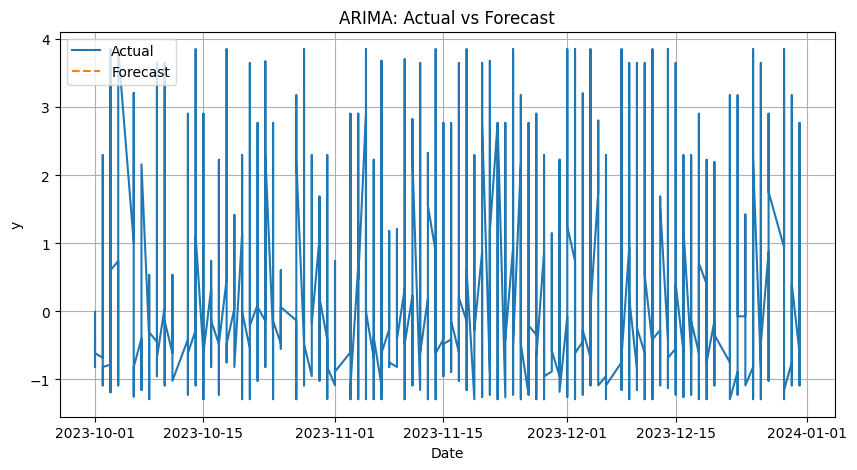

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(test_idx.index, test_idx['y'],      label='Actual')
plt.plot(forecast_df_A.index, y_pred_A, linestyle='--', label='Forecast')
plt.title('ARIMA: Actual vs Forecast')
plt.xlabel('Date'); plt.ylabel('y')
plt.legend(); plt.grid(True)
plt.show()

In [ ]:

forecast_test_Arima  = model_fit_Arima.forecast(steps=len(test_a))
forecast_test_Arima = pd.DataFrame(forecast_test_Arima, columns=['predicted_mean'], index=test_a.index)
forecast_test_Arima['predicted_mean'].fillna(method='ffill', inplace=True)  # Forward fill the missing values


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\DELL\AppData\Local\Temp\ipykernel_16820\2230306598.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

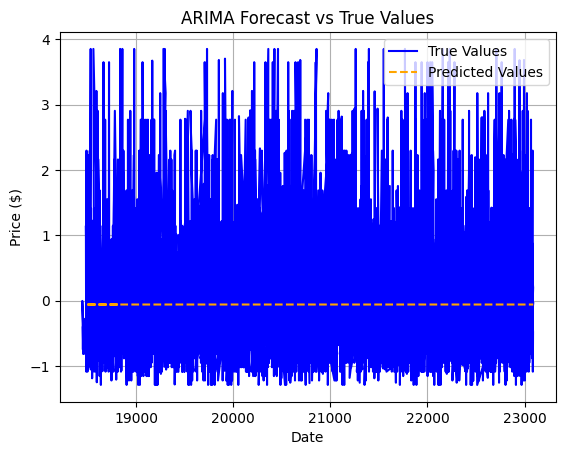

In [ ]:
plt.plot(test_a.index, test_a['y'], label='True Values', color='blue')

# Plot predicted values from the ARIMA forecast
plt.plot(forecast_test_Arima.index, forecast_test_Arima['predicted_mean'], label='Predicted Values', linestyle='--', color='orange')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('ARIMA Forecast vs True Values')
plt.legend()
plt.grid(True)
plt.show()

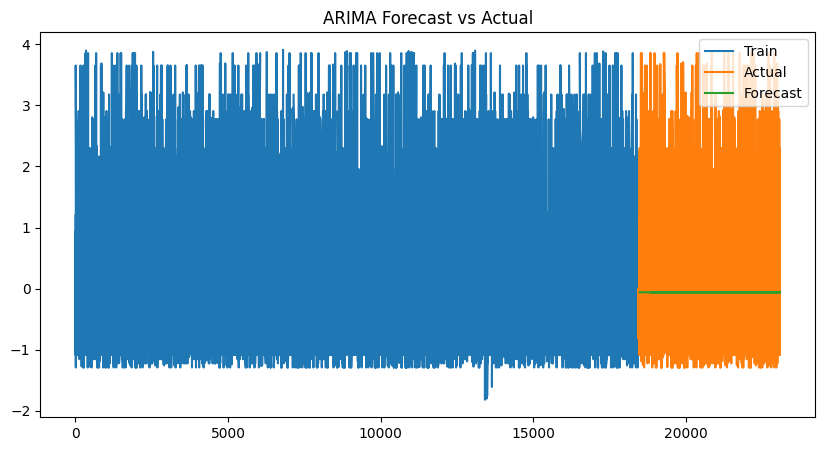

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(train_a.index, train_a['y'], label='Train')
plt.plot(test_a.index, test_a['y'], label='Actual')
plt.plot(test_a.index, forecast_test_Arima, label='Forecast')
plt.legend()
plt.title('ARIMA Forecast vs Actual')
plt.show()

## XGboost with prophet


In [ ]:
df = joblib.load('./Data/dataPreprocessing.pkl')
df['Price_to_Income'] = df['Price ($)'] / df['Annual Income']
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Price_Lag1'] = df['Price ($)'].shift(1)
df['Price_Lag2'] = df['Price ($)'].shift(2)
df['Rolling_Mean_7'] = df['Price ($)'].rolling(window=7).mean()
df['Rolling_Std_7'] = df['Price ($)'].rolling(window=7).std()
df.fillna(method='bfill', inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_16820\172283685.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [ ]:
X = df.drop(['Price ($)', 'Date'], axis=1)
y = df['Price ($)']
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.fit_transform(X)  # For cross-validation

In [ ]:
xgb = XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=7,
    n_estimators=300,
    subsample=0.8,
    random_state=42
)


In [ ]:
print('start fitting the train xgboost model and predicting testing....')
xgb.fit(X_train_scaled, y_train)
predictions = xgb.predict(X_test_scaled)
print('xgboost model fitted and prediction done')

start fitting the train xgboost model and predicting testing....
xgboost model fitted and prediction done


In [ ]:

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print(f"XGBoost MAE (Test Set): {mae:.6f}")
print(f"XGBoost MAE (Train Set): {mean_absolute_error(y_train, xgb.predict(X_train_scaled)):.6f}")
print(f"XGBoost RMSE (Test Set): {rmse:.6f}")
print(f"XGBoost RMSE (Train Set): {np.sqrt(mean_squared_error(y_train, xgb.predict(X_train_scaled))):.6f}")
print(f"XGBoost R² (Test Set): {r2:.6f}")
print(f"XGBoost R2 (Train Set): {r2_score(y_train, xgb.predict(X_train_scaled)):.6f}")


XGBoost MAE (Test Set): 0.091634
XGBoost MAE (Train Set): 0.038936
XGBoost RMSE (Test Set): 0.143472
XGBoost RMSE (Train Set): 0.053856
XGBoost R² (Test Set): 0.979436
XGBoost R2 (Train Set): 0.997099


In [ ]:
tscv = TimeSeriesSplit(n_splits=5)
cv_scores = cross_val_score(xgb, X_scaled, y, cv=tscv, scoring='neg_mean_absolute_error')
cv_mae = -cv_scores.mean()
print(f"TimeSeriesSplit CV MAE: {cv_mae:.6f}")
print(f"Cross-Validation MAE: {cv_mae:.6f}")
print(f"Cross-Validation RMSE: {np.sqrt(-cv_scores.mean()):.6f}")
print(f"Cross-Validation R2: {cv_scores.mean():.6f}")

TimeSeriesSplit CV MAE: 0.117375
Cross-Validation MAE: 0.117375
Cross-Validation RMSE: 0.342601
Cross-Validation R2: -0.117375


In [ ]:
# Walk-forward validation
mae_scores, rmse_scores = [], []
for train_idx, test_idx in tscv.split(X_scaled):
    X_tr, X_te = X_scaled[train_idx], X_scaled[test_idx]
    y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]
    xgb.fit(X_tr, y_tr)
    preds = xgb.predict(X_te)
    mae_scores.append(mean_absolute_error(y_te, preds))
    rmse_scores.append(np.sqrt(mean_squared_error(y_te, preds)))
print(f"Walk-Forward MAE: {np.mean(mae_scores):.6f}")
print(f"Walk-Forward RMSE: {np.mean(rmse_scores):.6f}")
print(f"Walk-Forward R2: {r2_score(y, xgb.predict(X)):.6f}")

Walk-Forward MAE: 0.117375
Walk-Forward RMSE: 0.185324
Walk-Forward R2: -0.939034


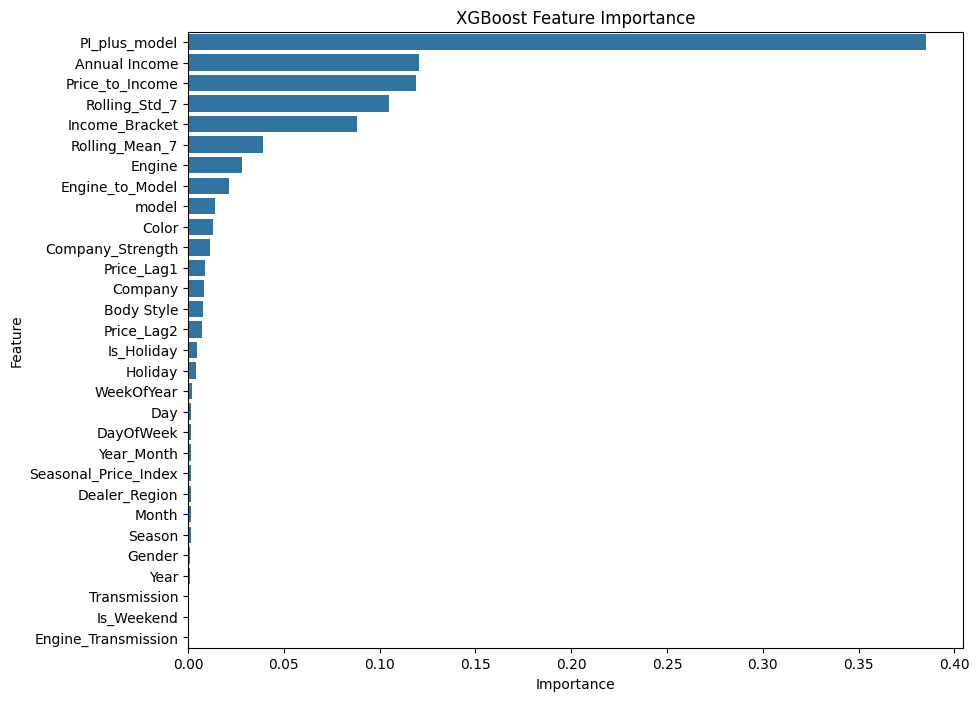

In [ ]:
# Feature importance plot
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': xgb.feature_importances_})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('XGBoost Feature Importance')
plt.savefig('./Images/feature_importance.png')
plt.show()

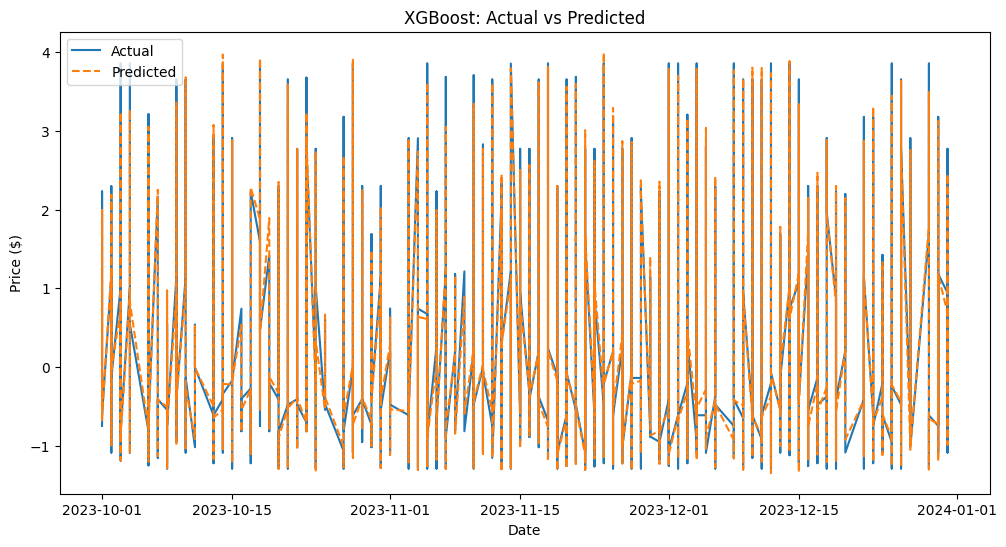

In [ ]:


# Actual vs Predicted plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'].iloc[-len(y_test):], y_test, label='Actual')
plt.plot(df['Date'].iloc[-len(y_test):], predictions, label='Predicted', linestyle='--')
plt.title('XGBoost: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.savefig('./Images/actual_vs_predicted.png')
plt.show()

In [ ]:
# Ensemble with Holt-Winters
hw = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=12).fit()
hw_forecast = hw.forecast(len(y_test))
ensemble_predictions = (predictions + hw_forecast) / 2
ensemble_mae = mean_absolute_error(y_test, ensemble_predictions)
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_predictions))
print(f"Ensemble MAE: {ensemble_mae:.6f}")
print(f"Ensemble RMSE: {ensemble_rmse:.6f}")

Ensemble MAE: 18.073847
Ensemble RMSE: 18.835840


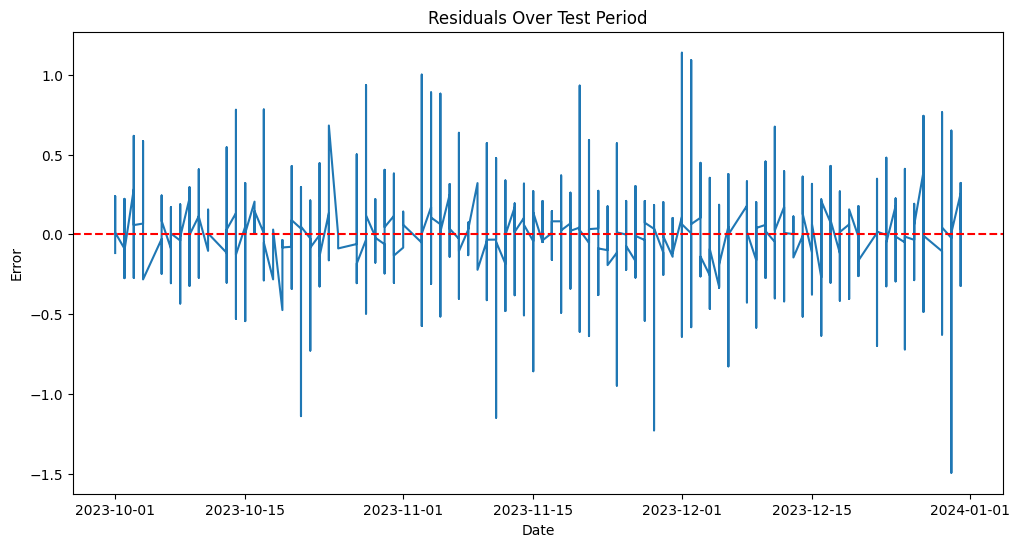

In [ ]:
residuals = y_test - predictions
plt.figure(figsize=(12, 6))
plt.plot(df['Date'].iloc[-len(y_test):], residuals)
plt.title('Residuals Over Test Period')
plt.xlabel('Date')
plt.ylabel('Error')
plt.axhline(0, color='red', linestyle='--')
plt.savefig('./Images/residuals.png')
plt.show()


In [ ]:

# Hyperparameter tuning
param_dist = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 1.0]
}
random_search = RandomizedSearchCV(
    xgb, param_distributions=param_dist, n_iter=20,
    cv=TimeSeriesSplit(n_splits=5), scoring='neg_mean_absolute_error', random_state=42
)
random_search.fit(X_train_scaled, y_train)
print("Best parameters:", random_search.best_params_)

Best parameters: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


XGBoost MAE (Test Set): 0.0905
XGBoost RMSE (Test Set): 0.1398
XGBoost R2 (Test Set): 0.9805
Cross-Validation MAE: 0.0919
Walk-Forward MAE: 0.1182
Walk-Forward RMSE: 0.1874


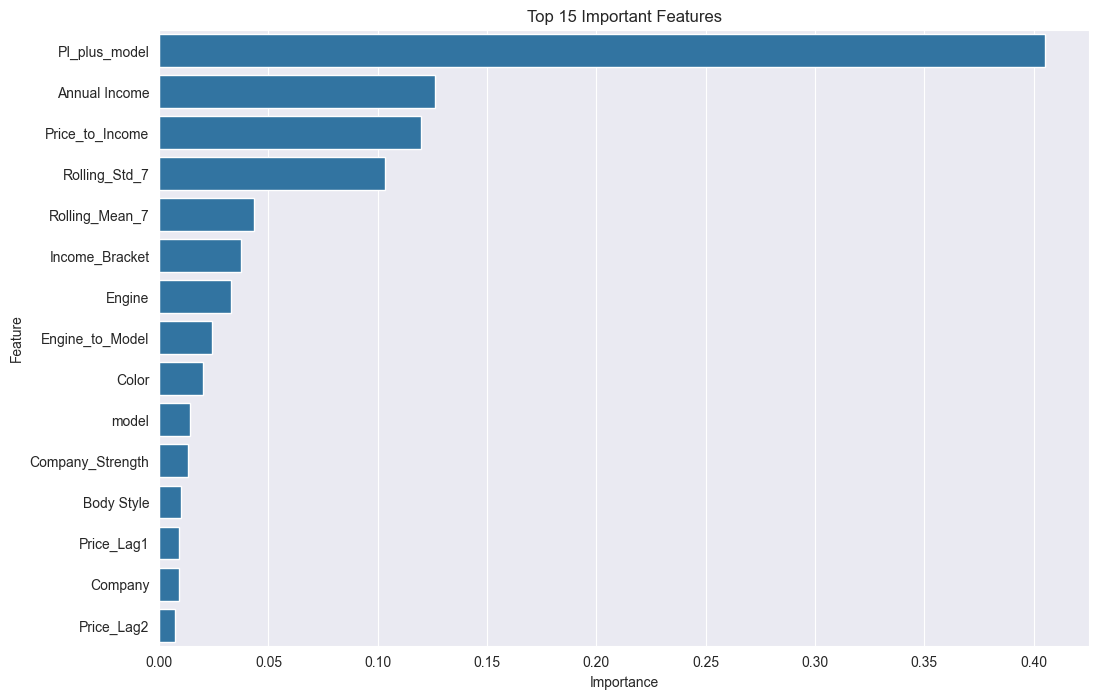

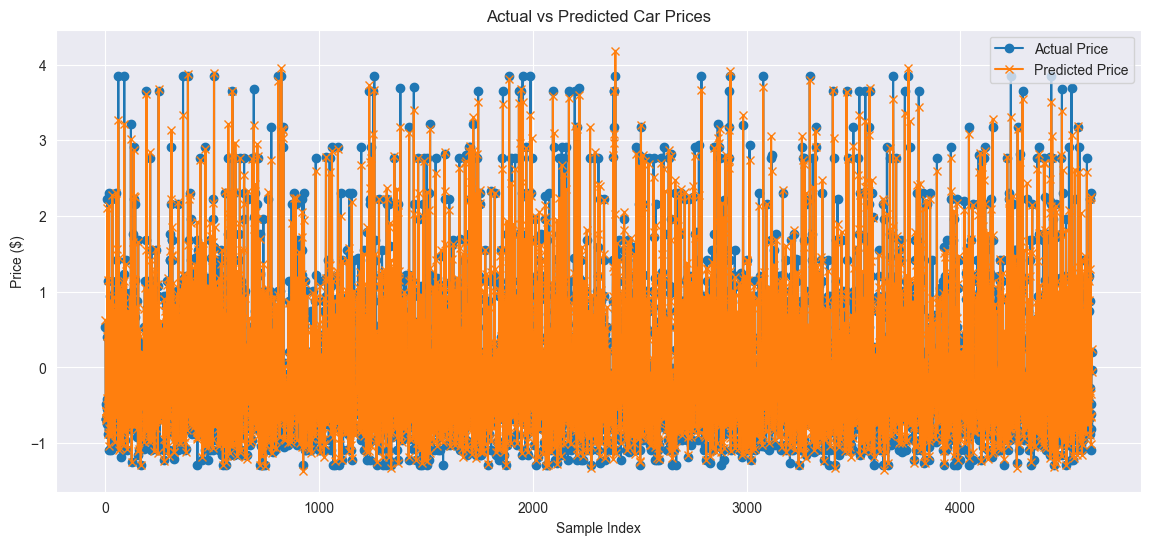

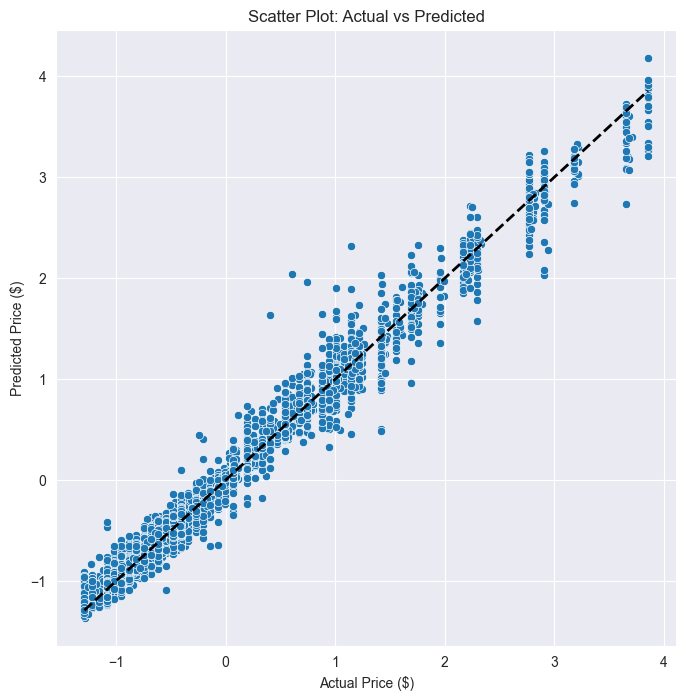

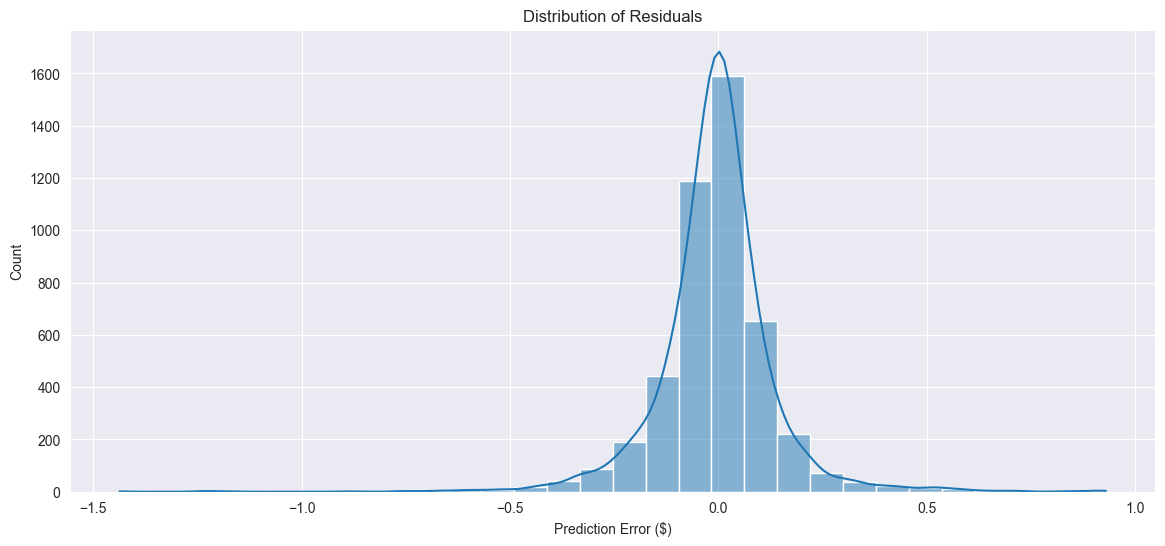

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Ensemble MAE: 0.3772
Ensemble RMSE: 0.5185


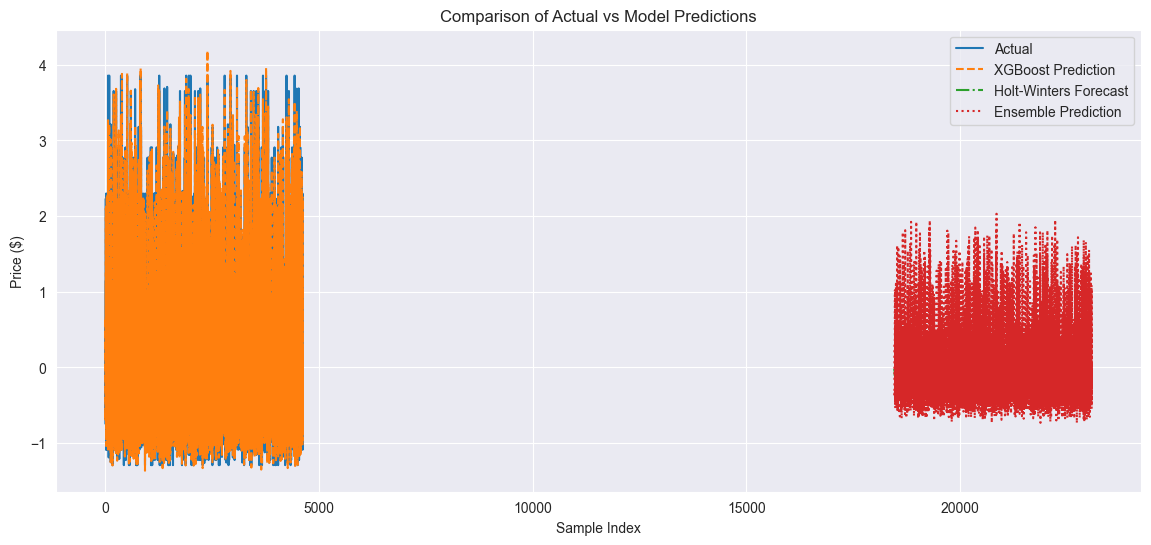

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters Found: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.05, 'colsample_bytree': 0.8}


In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Basic settings
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Load data
df = joblib.load('./Assisting/dataPreprocessing.pkl')

# Feature engineering
df['Price_to_Income'] = df['Price ($)'] / df['Annual Income']
df['Price_Lag1'] = df['Price ($)'].shift(1)
df['Price_Lag2'] = df['Price ($)'].shift(2)
df['Rolling_Mean_7'] = df['Price ($)'].rolling(window=7).mean()
df['Rolling_Std_7'] = df['Price ($)'].rolling(window=7).std()
df = df.dropna()

# Prepare features and target
X = df.drop(['Price ($)', 'Date'], axis=1)
y = df['Price ($)']
X = pd.get_dummies(X, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model initialization
# Best Parameters Found: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
xgb = XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.8,
    learning_rate=0.05,
    max_depth=9,
    n_estimators=300,
    subsample=0.9,
    random_state=42
)
# Train
xgb.fit(X_train, y_train)

# Predict
predictions = xgb.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(f"XGBoost MAE (Test Set): {mae:.4f}")
print(f"XGBoost RMSE (Test Set): {rmse:.4f}")
print(f"XGBoost R2 (Test Set): {r2:.4f}")

# Cross-validation
cv_scores = cross_val_score(xgb, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"Cross-Validation MAE: {-cv_scores.mean():.4f}")

# Walk-forward validation
tscv = TimeSeriesSplit(n_splits=5)
mae_scores, rmse_scores = [], []
for train_idx, test_idx in tscv.split(X):
    X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
    y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]

    scaler_wf = StandardScaler()
    X_tr = scaler_wf.fit_transform(X_tr)
    X_te = scaler_wf.transform(X_te)

    xgb.fit(X_tr, y_tr)
    preds = xgb.predict(X_te)

    mae_scores.append(mean_absolute_error(y_te, preds))
    rmse_scores.append(np.sqrt(mean_squared_error(y_te, preds)))

print(f"Walk-Forward MAE: {np.mean(mae_scores):.4f}")
print(f"Walk-Forward RMSE: {np.mean(rmse_scores):.4f}")

# Feature importance
importances = xgb.feature_importances_
feat_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(15))
plt.title('Top 15 Important Features')
plt.show()

# Actual vs Predicted Visualization
plt.figure(figsize=(14,6))
plt.plot(y_test.values, label='Actual Price', marker='o')
plt.plot(predictions, label='Predicted Price', marker='x')
plt.title('Actual vs Predicted Car Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

# Predicted vs Actual Scatter Plot
plt.figure(figsize=(8,8))
sns.scatterplot(x=y_test, y=predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Scatter Plot: Actual vs Predicted')
plt.show()

# Residuals plot
residuals = y_test.values - predictions
plt.figure(figsize=(14,6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Prediction Error ($)')
plt.show()

# Ensemble with Holt-Winters
hw = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=12).fit()
hw_forecast = hw.forecast(len(y_test))

# Ensemble prediction (Simple Average)
ensemble_pred = (predictions + hw_forecast) / 2

# Evaluate Ensemble
ensemble_mae = mean_absolute_error(y_test, ensemble_pred)
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_pred))

print(f"Ensemble MAE: {ensemble_mae:.4f}")
print(f"Ensemble RMSE: {ensemble_rmse:.4f}")

# Visualize Ensemble
plt.figure(figsize=(14,6))
plt.plot(y_test.values, label='Actual')
plt.plot(predictions, label='XGBoost Prediction', linestyle='--')
plt.plot(hw_forecast, label='Holt-Winters Forecast', linestyle='-.')
plt.plot(ensemble_pred, label='Ensemble Prediction', linestyle=':')
plt.title('Comparison of Actual vs Model Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Price ($)')
plt.legend()
plt.show()




Animation size has reached 21019058 bytes, exceeding the limit of 20971520.0. If you're sure you want a larger animation embedded, set the animation.embed_limit rc parameter to a larger value (in MB). This and further frames will be dropped.


KeyboardInterrupt: 

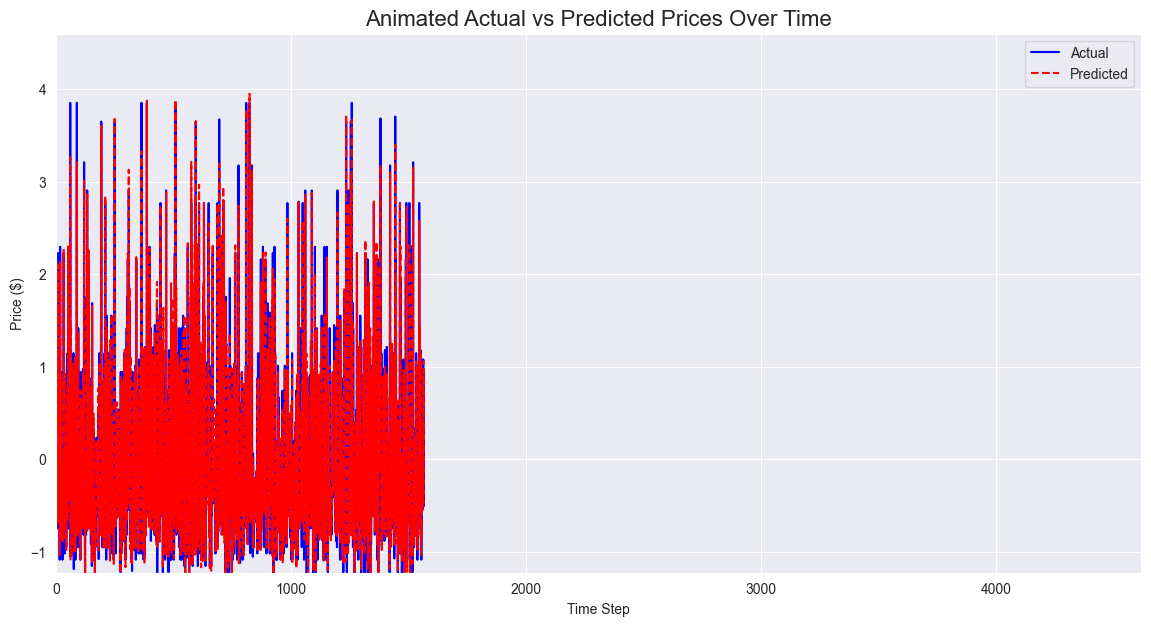

In [ ]:
import matplotlib.animation as animation

# Set up the figure
fig, ax = plt.subplots(figsize=(14, 7))
ax.set_xlim(0, len(y_test))
ax.set_ylim(min(y_test.min(), predictions.min()) * 0.9, max(y_test.max(), predictions.max()) * 1.1)
line_actual, = ax.plot([], [], label='Actual', color='blue')
line_pred, = ax.plot([], [], label='Predicted', color='red', linestyle='--')
ax.set_title('Animated Actual vs Predicted Prices Over Time', fontsize=16)
ax.set_xlabel('Time Step')
ax.set_ylabel('Price ($)')
ax.legend()

# Initialization function: plot the background
def init():
    line_actual.set_data([], [])
    line_pred.set_data([], [])
    return line_actual, line_pred

# Animation function: update the lines
def animate(i):
    x = np.arange(0, i)
    line_actual.set_data(x, y_test.values[:i])
    line_pred.set_data(x, predictions[:i])
    return line_actual, line_pred

# Create animation
ani = animation.FuncAnimation(
    fig, animate, init_func=init, frames=len(y_test), interval=100, blit=True
)

# To display animation inside Jupyter Notebook
from IPython.display import HTML
HTML(ani.to_jshtml())

# If you want to save it as a video:
# ani.save('prediction_animation.mp4', writer='ffmpeg')
